/tmp/ipykernel_103880/1032471094.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/minyoungxi/anaconda3/envs/TorchEnv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/minyoungxi/anaconda3/envs/TorchEnv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


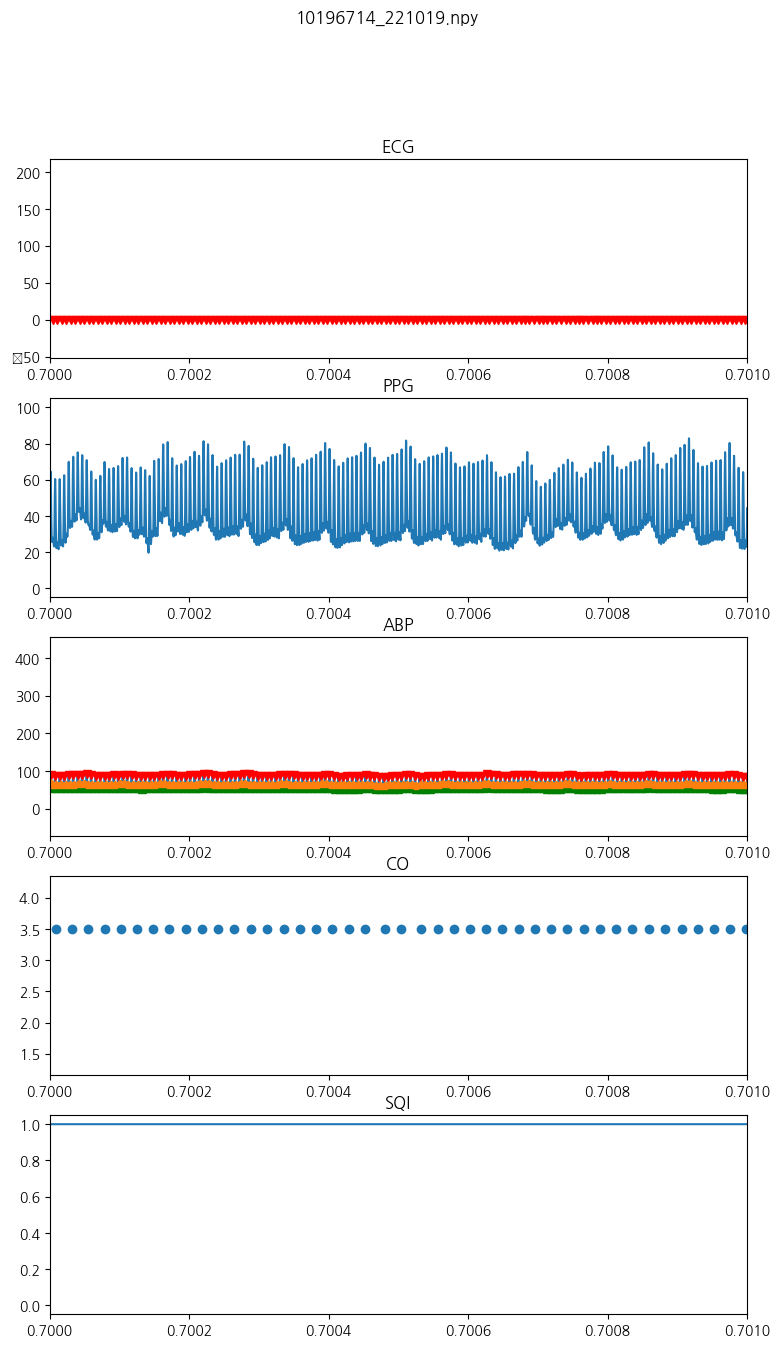

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Data Import
path_folder = '/home/minyoungxi/MINYOUNGXI/SMC/10196714/'
file_name = '10196714_221019.npy'

WAVE = np.load(path_folder + 'WAVE_' +file_name)
BP = np.load(path_folder + 'BP_' +file_name,'').squeeze()
SQI = np.load(path_folder + 'SQI_' +file_name).squeeze()
CO = np.load(path_folder + 'CO_' +file_name)
NIBP = np.load(path_folder + 'NIBP_' +file_name)
ECG, PPG, ABP, t = WAVE[0,:], WAVE[1,:], WAVE[2,:], WAVE[3,:]
CO, tCO = CO[0,:], CO[1,:]
NIBP, tNIBP = NIBP[0,:], NIBP[1,:]

# Decode for BP & Rpeak
idx_Rpeak = np.array(np.where(BP > 500)[0])
BP[idx_Rpeak] = BP[idx_Rpeak] - 1000
BP[0] = 0 # ... Can't distinguish MAP & SBP at first
idx_DBP = np.array(np.where(BP < 0)[0])
idx_MAP = idx_DBP + 1
if idx_MAP[-1] > len(BP): idx_MAP = np.delete(idx_MAP,-1) # Check OutOfBound
idx_SBP = np.setdiff1d(np.array(np.where(BP > 0)[0]), idx_MAP)
DBP, MAP, SBP = -BP[idx_DBP], BP[idx_MAP], BP[idx_SBP]

# Display
fig, axs = plt.subplots(nrows=5, ncols=1,figsize=(9,15))
fig.suptitle(file_name)
axs[0].plot(t,ECG)
axs[0].plot(t[idx_Rpeak],ECG[idx_Rpeak],'rv')
axs[0].set_title('ECG')
axs[1].plot(t,PPG)
axs[1].set_title('PPG')
axs[2].plot(t,ABP)
axs[2].plot(t[idx_SBP],SBP,'rv')
axs[2].plot(t[idx_DBP],DBP,'g^')
axs[2].plot(t[idx_MAP],MAP,'p-')
axs[2].plot(tNIBP,NIBP,'ko')
axs[2].set_title('ABP')
axs[3].plot(tCO,CO,'o')
axs[3].set_title('CO')
axs[4].plot(t,SQI)
axs[4].set_title('SQI')
fig.show()

for ax in axs:
    ax.set_xlim([0.7,0.701])   

In [6]:
t[idx_Rpeak],ECG[idx_Rpeak]

(array([0.01418329, 0.01418727, 0.01419384, ..., 0.95828766, 0.95829433,
        0.9583009 ], dtype=float32),
 array([-0.519999  , -0.599999  , -0.46499902, ..., -0.56999904,
        -0.5672576 , -0.56257975], dtype=float32))

In [7]:
idx_Rpeak

array([  150229,   150272,   150343, ..., 10346556, 10346628, 10346699])